In [70]:
import numpy as np
import pandas as pd

In [71]:
from sktime.utils.plotting import plot_series

df = pd.read_csv('Data_Translated', sep=';')
df.head()

,Date,ABS_Value,Freq
0,January 2018,1810608,0.023
1,February 2018,2115137,0.027
2,March 2018,2107574,0.025
3,April 2018,1932288,0.025
4,May 2018,2175195,0.029


In [72]:
abs_series = pd.DataFrame(df['ABS_Value'])
freq_series = pd.DataFrame(df['Freq'])
freq_series.index = pd.DatetimeIndex(df["Date"])
abs_series.index = pd.DatetimeIndex(df["Date"])
freq_series.name = 'Freq'

In [73]:
freq_series.head()

,Freq
Date,
2018-01-01,0.023
2018-02-01,0.027
2018-03-01,0.025
2018-04-01,0.025
2018-05-01,0.029


In [74]:
abs_series.head()

,ABS_Value
Date,
2018-01-01,1810608
2018-02-01,2115137
2018-03-01,2107574
2018-04-01,1932288
2018-05-01,2175195


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Freq'>)

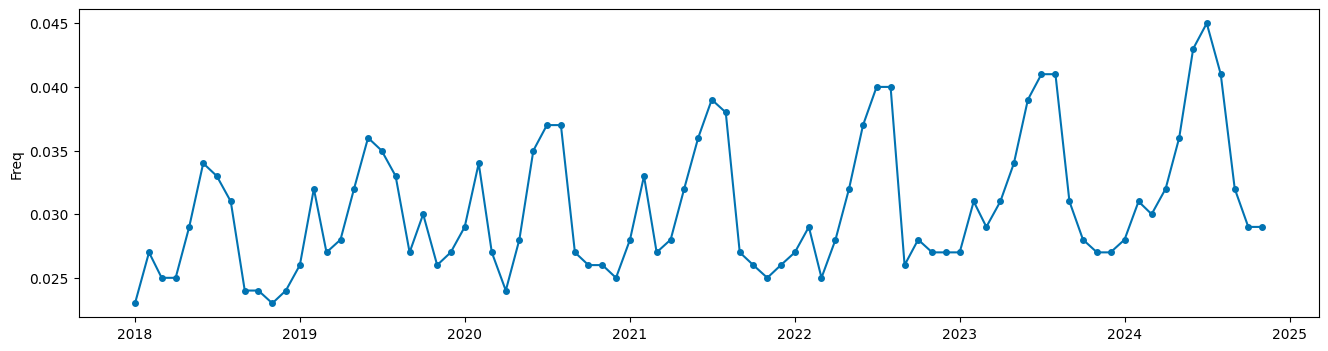

In [75]:
plot_series(freq_series)

In [76]:
from sktime.split import temporal_train_test_split

In [77]:
train_obs = int(round(len(abs_series) * 0.7, 0))

In [78]:
y_train, y_test = temporal_train_test_split(abs_series, train_size = train_obs)

In [79]:
y_train

,ABS_Value
Date,
2018-01-01,1810608
2018-02-01,2115137
2018-03-01,2107574
2018-04-01,1932288
2018-05-01,2175195
2018-06-01,2353225
2018-07-01,2350684
2018-08-01,2214743
2018-09-01,1920199


3 пункт начинается отсюда

In [80]:
from statsmodels.tsa.seasonal import MSTL

In [81]:
mstl = MSTL(y_train["ABS_Value"], periods=12)

In [82]:
res = mstl.fit()

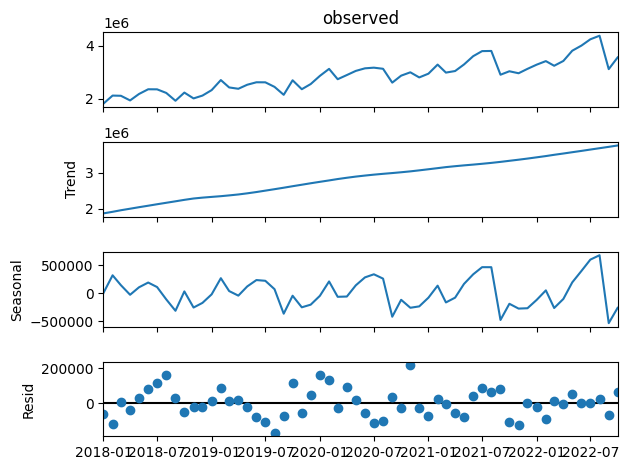

In [83]:
ax = res.plot()